In [12]:
# For Treating Data 

import pandas as pd
import numpy as np

# For graphics 
import seaborn as sns
import matplotlib.pyplot as plt

# For modeling

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [5]:
shel = pd.read_csv('data_for_model',index_col=0)
shel.head()

,AnimalType,Spayed/Neutered,Age_Months,OutcomeType,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,1,1,12.00,Return_to_owner,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,12.00,Euthanasia,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,24.00,Adoption,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0.69,Transfer,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,24.00,Transfer,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# look at co-Colinearity 


In [13]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
shel['OutcomeType'] = le.fit_transform(shel['OutcomeType'])

#Method : inverse_transform(self, y)
#What it does: Transform labels back to original encoding.


In [7]:
shel

,AnimalType,Spayed/Neutered,Age_Months,OutcomeType,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,1,1,12.00,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,12.00,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,24.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0.69,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,24.00,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26705,0,0,1.00,4,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
26706,0,1,3.00,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
26707,1,1,48.00,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
26708,0,0,0.92,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
#Correlation

correlation = shel.corr()

#Remove from the correlation matrix in columns the feature we want to predict
correlation_no_targ = correlation.drop(columns = 'OutcomeType')
#Remove from the correlation matrix in index the feature we want to predict
correlation_no_targ = correlation_no_targ.drop(index = 'OutcomeType')

correlation_no_targ

,AnimalType,Spayed/Neutered,Age_Months,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,Pit Bull Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
AnimalType,1.000000,0.274949,0.232324,0.224668,-0.166717,-0.213278,-0.829743,0.125242,0.195800,0.234061,...,0.004255,0.300943,-0.145473,-0.182117,0.157084,0.170756,0.085216,0.001671,0.083211,-0.214594
Spayed/Neutered,0.274949,1.000000,0.184265,0.043362,-0.019686,-0.037896,-0.261810,0.031207,0.061767,0.007864,...,0.010930,0.090289,-0.039984,-0.027431,0.047513,0.066093,0.028735,0.038964,0.084621,-0.312166
Age_Months,0.232324,0.184265,1.000000,0.065247,0.030950,-0.043033,-0.238097,0.008825,0.031882,0.011178,...,0.024854,0.066657,-0.036975,-0.028828,0.040408,0.012157,0.034388,0.014666,0.028844,-0.109895
Chihuahua Shorthair Mix,0.224668,0.043362,0.065247,1.000000,-0.037456,-0.047917,-0.186417,-0.039467,-0.061702,-0.073759,...,-0.018024,0.200300,-0.032683,-0.040916,0.039576,-0.009110,0.010023,-0.002347,0.021024,-0.047238
Domestic Longhair Mix,-0.166717,-0.019686,0.030950,-0.037456,1.000000,-0.025350,-0.098623,-0.020880,-0.032643,-0.039022,...,0.006554,-0.050252,0.020814,0.034326,-0.024974,-0.009741,-0.011659,0.010094,-0.014860,0.012124
Domestic Medium Hair Mix,-0.213278,-0.037896,-0.043033,-0.047917,-0.025350,1.000000,-0.126167,-0.026711,-0.041760,-0.049920,...,0.000534,-0.064286,0.036416,0.042321,-0.033859,-0.019786,-0.018334,0.011159,-0.016188,0.012800
Domestic Shorthair Mix,-0.829743,-0.261810,-0.238097,-0.186417,-0.098623,-0.126167,1.000000,-0.103919,-0.162464,-0.194211,...,-0.007287,-0.249851,0.134503,0.152133,-0.130412,-0.129707,-0.071328,-0.014419,-0.071899,0.218129
German Shepherd Mix,0.125242,0.031207,0.008825,-0.039467,-0.020880,-0.026711,-0.103919,1.000000,-0.034396,-0.041117,...,-0.010048,0.091496,-0.018219,-0.022809,0.003362,-0.102607,-0.012560,0.004510,0.006566,-0.027971
Labrador Retriever Mix,0.195800,0.061767,0.031882,-0.061702,-0.032643,-0.041760,-0.162464,-0.034396,1.000000,-0.064281,...,-0.015708,-0.014809,-0.028484,-0.035659,-0.030484,-0.012343,0.192629,0.004492,0.008306,-0.032323
Pit Bull Mix,0.234061,0.007864,0.011178,-0.073759,-0.039022,-0.049920,-0.194211,-0.041117,-0.064281,1.000000,...,-0.018777,-0.002877,-0.034049,-0.042627,-0.034501,0.206619,-0.011027,0.008648,0.012237,-0.052737


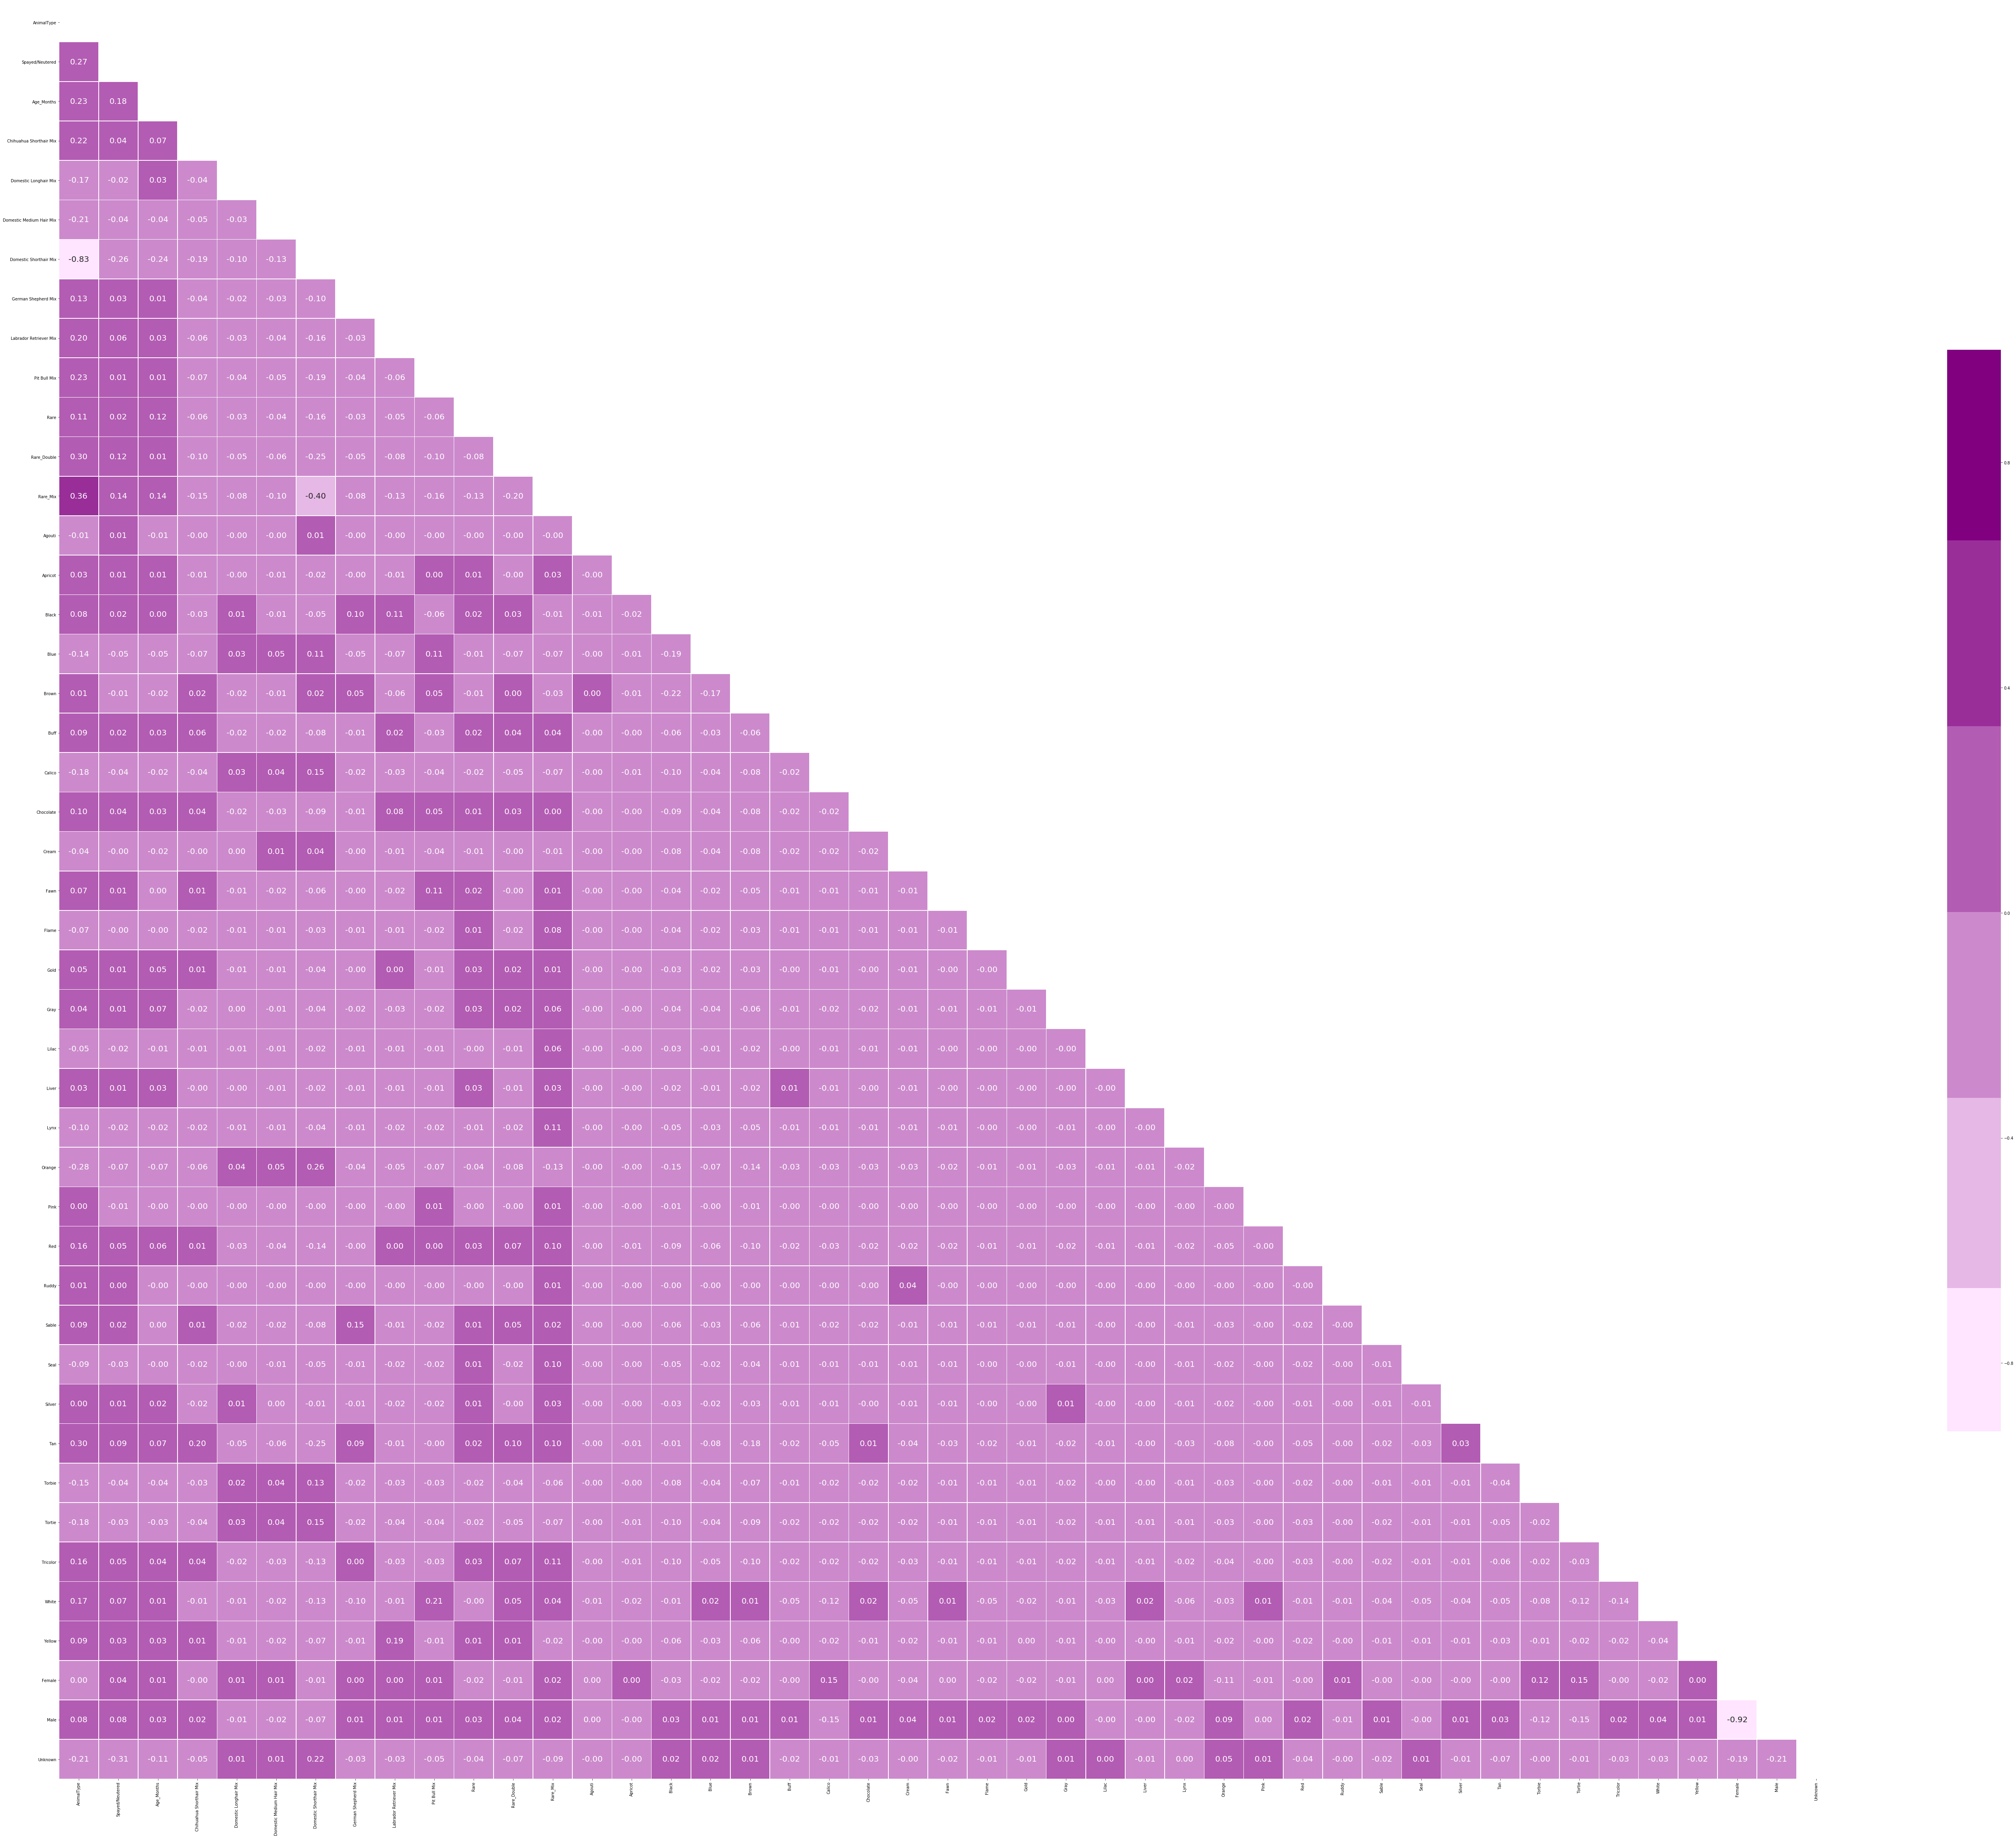

In [15]:


f, ax = plt.subplots(figsize=(100, 100))

mask = np.triu(np.ones_like(correlation_no_targ, dtype=np.bool)) # can remove this to have the full matrix

cmap = sns.light_palette("purple", reverse = False)

sns.heatmap(correlation_no_targ, mask=mask, annot = True,  annot_kws={"size": 20}, fmt='.2f', cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax = ax)

plt.show()

In [10]:
"""
We don't have hight Collinearity between collumns - good. But also we don't have big correlation between features and the 
the feature (outcome type) that we want to predict - bad """

"\nWe don't have hight Collinearity between collumns - good. But also we don't have big correlation between features and the \nthe feature (outcome type) that we want to predict - bad "

In [11]:
#sns.pairplot(shel)

# Modeling

In [ ]:
"""
Its a Supervised ML problem because we know what is our targer y = ('OutcomeType'). Model 

"""

In [17]:


X = shel.drop(columns = 'OutcomeType')
y = shel

,AnimalType,Spayed/Neutered,Age_Months,Chihuahua Shorthair Mix,Domestic Longhair Mix,Domestic Medium Hair Mix,Domestic Shorthair Mix,German Shepherd Mix,Labrador Retriever Mix,Pit Bull Mix,...,Silver,Tan,Torbie,Tortie,Tricolor,White,Yellow,Female,Male,Unknown
0,1,1,12.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,12.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,24.00,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0.69,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,24.00,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:

# Standarize features 1st with StandardScaler()

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [ ]:
# Split




# Dimension Reduction - PCA


To-Do before modelling:
Dimensionality Reduction (PCA) (to have less columns, remove redundant columns)
Feature Selection/Engineering (choosing the most important columns)





Classification algorithms (Python)